Post Instruction : Dataset used in this project - 'https://corgis-edu.github.io/corgis/csv/state_crime/'

From the Unified Crime Reporting Statistics and under the collaboration of the U.S. Department of Justice and the Federal Bureau of Investigation information crime statistics are available for public review. The following data set has information on the crime rates and totals for states across the United States for a wide range of years. The crime reports are divided into two main categories: property and violent crime. Property crime refers to burglary, larceny, and motor related crime while violent crime refers to assault, murder, rape, and robbery. These reports go from 1960 to 2019.

The Techniques used for this project Matplotlib,Seaborn,Pandas,Numpy and Basics of python learnt in this course.

# Downloading the Dataset
I found this data set from Kaggle and according to jovian i have loaded via jovian opendatasets.

Link : https://corgis-edu.github.io/corgis/datasets/csv/state_crime/state_crime.csv'

We need to install Jovain opendaasets as its not previously installed as shown below:

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
dataset = 'https://corgis-edu.github.io/corgis/datasets/csv/state_crime/state_crime.csv'
od.download(dataset)

Using downloaded and verified file: ./state_crime.csv


## STATE Wise Crimes in USA (1960 -2019)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [4]:
project_df = pd.read_csv('state_crime.csv') #loading the csv

Showing the dataframe as project_df

In [5]:
project_df  # displaying the csv

State  Year  Data.Population  Data.Rates.Property.All  \
0     Alabama  1960          3266740                   1035.4   
1     Alabama  1961          3302000                    985.5   
2     Alabama  1962          3358000                   1067.0   
3     Alabama  1963          3347000                   1150.9   
4     Alabama  1964          3407000                   1358.7   
...       ...   ...              ...                      ...   
3110  Wyoming  2015           586107                   1902.6   
3111  Wyoming  2016           585501                   1957.3   
3112  Wyoming  2017           579315                   1830.4   
3113  Wyoming  2018           577737                   1785.1   
3114  Wyoming  2019           578759                   1571.1   

      Data.Rates.Property.Burglary  Data.Rates.Property.Larceny  \
0                            355.9                        592.1   
1                            339.3                        569.4   
2                            349.1                        634.5   
3                            376.9                        683.4   
4                            466.6                        784.1   
...                            ...                          ...   
3110                         300.6                       1500.9   
3111                         302.5                       1518.2   
3112                         275.0                       1421.0   
3113                         264.0                       1375.9   
3114                         241.2                       1206.7   

      Data.Rates.Property.Motor  Data.Rates.Violent.All  \
0                          87.3                   186.6   
1                          76.8                   168.5   
2                          83.4                   157.3   
3                          90.6                   182.7   
4                         108.0                   213.1   
...                         ...                     ...   
3110                      101.0                   222.1   
3111                      136.6                   244.2   
3112                      134.5                   237.5   
3113                      145.2                   212.2   
3114                      123.2                   217.4   

      Data.Rates.Violent.Assault  Data.Rates.Violent.Murder  ...  \
0                          138.1                       12.4  ...   
1                          128.9                       12.9  ...   
2                          119.0                        9.4  ...   
3                          142.1                       10.2  ...   
4                          163.0                        9.3  ...   
...                          ...                        ...  ...   
3110                       179.8                        2.7  ...   
3111                       195.7                        3.4  ...   
3112                       176.4                        2.6  ...   
3113                       150.6                        2.3  ...   
3114                       147.6                        2.2  ...   

      Data.Rates.Violent.Robbery  Data.Totals.Property.All  \
0                           27.5                     33823   
1                           19.1                     32541   
2                           22.5                     35829   
3                           24.7                     38521   
4                           29.1                     46290   
...                          ...                       ...   
3110                        10.1                     11151   
3111                        10.1                     11460   
3112                        13.1                     10604   
3113                        17.3                     10313   
3114                        11.6                      9093   

      Data.Totals.Property.Burglary  Data.Totals.Property.Larceny  \
0                             11626                         19344   
1            

Here we clean the dataset

1. Explore the number of rows & columns, ranges of values etc.
2. Handle missing, incorrect and invalid data.
3. We drop few columns which are not necessary.

Print the columns

In [6]:
project_df.columns #printing the columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

Using .info() we get datatype of values and get null values.

In [7]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          3115 non-null   object 
 1   Year                           3115 non-null   int64  
 2   Data.Population                3115 non-null   int64  
 3   Data.Rates.Property.All        3115 non-null   float64
 4   Data.Rates.Property.Burglary   3115 non-null   float64
 5   Data.Rates.Property.Larceny    3115 non-null   float64
 6   Data.Rates.Property.Motor      3115 non-null   float64
 7   Data.Rates.Violent.All         3115 non-null   float64
 8   Data.Rates.Violent.Assault     3115 non-null   float64
 9   Data.Rates.Violent.Murder      3115 non-null   float64
 10  Data.Rates.Violent.Rape        3115 non-null   float64
 11  Data.Rates.Violent.Robbery     3115 non-null   float64
 12  Data.Totals.Property.All       3115 non-null   i

1. We use .isna and add them to know if there any na values in our dataframe.

In [8]:
null_values = project_df.isna().sum()
null_values

State                            0
Year                             0
Data.Population                  0
Data.Rates.Property.All          0
Data.Rates.Property.Burglary     0
Data.Rates.Property.Larceny      0
Data.Rates.Property.Motor        0
Data.Rates.Violent.All           0
Data.Rates.Violent.Assault       0
Data.Rates.Violent.Murder        0
Data.Rates.Violent.Rape          0
Data.Rates.Violent.Robbery       0
Data.Totals.Property.All         0
Data.Totals.Property.Burglary    0
Data.Totals.Property.Larceny     0
Data.Totals.Property.Motor       0
Data.Totals.Violent.All          0
Data.Totals.Violent.Assault      0
Data.Totals.Violent.Murder       0
Data.Totals.Violent.Rape         0
Data.Totals.Violent.Robbery      0
dtype: int64

2. We use dropna() to remove rows with null values from the DataFrame.

In [9]:
project_df = project_df.dropna()

In [10]:
null_values = project_df.isna().sum()
null_values
project_df.shape

(3115, 21)

3. We use .describe to get the maximum,mean, std,minimum and other statistical values in our dataframe.

In [11]:
project_df.describe()

Year  Data.Population  Data.Rates.Property.All  \
count  3115.000000     3.115000e+03              3115.000000   
mean   1989.544141     9.708502e+06              3542.202311   
std      17.299570     3.506750e+07              1418.191397   
min    1960.000000     2.261670e+05               573.100000   
25%    1975.000000     1.279156e+06              2472.650000   
50%    1990.000000     3.358000e+06              3438.400000   
75%    2005.000000     6.082836e+06              4439.100000   
max    2019.000000     3.282395e+08              9512.100000   

       Data.Rates.Property.Burglary  Data.Rates.Property.Larceny  \
count                   3115.000000                  3115.000000   
mean                     876.532520                  2322.659133   
std                      446.531611                   897.934463   
min                      126.300000                   293.300000   
25%                      535.000000                  1663.800000   
50%                      796.600000                  2275.700000   
75%                     1133.850000                  2877.500000   
max                     2906.700000                  5833.800000   

       Data.Rates.Property.Motor  Data.Rates.Violent.All  \
count                3115.000000             3115.000000   
mean                  343.011300              397.877047   
std                   221.654068              287.498896   
min                    28.400000                9.500000   
25%                   185.600000              217.200000   
50%                   288.900000              342.200000   
75%                   437.200000              518.250000   
max                  1839.900000             2921.800000   

       Data.Rates.Violent.Assault  Data.Rates.Violent.Murder  \
count                 3115.000000                3115.000000   
mean                   237.365040                   6.477207   
std                    159.336737                   5.886449   
min                      3.600000                   0.200000   
25%                    124.000000                   3.100000   
50%                    205.100000                   5.400000   
75%                    319.350000                   8.400000   
max                   1557.600000                  80.600000   

       Data.Rates.Violent.Rape  Data.Rates.Violent.Robbery  \
count              3115.000000                 3115.000000   
mean                 30.179872                  123.853258   
std                  16.694626                  143.261882   
min                   0.800000                    1.900000   
25%                  18.500000                   42.700000   
50%                  28.800000                   93.800000   
75%                  39.800000                  152.800000   
max                 161.600000                 1635.100000   

       Data.Totals.Property.All  Data.Totals.Property.Burglary  \
count              3.115000e+03                   3.115000e+03   
mean               3.560081e+05                   8.977698e+04   
std                1.321823e+06                   3.376635e+05   
min                3.147000e+03                   7.510000e+02   
25%                3.974500e+04                   9.613500e+03   
50%                1.092840e+05                   2.703800e+04   
75%                2.253325e+05                   5.562000e+04   
max                1.296112e+07                   3.795200e+06   

       Data.Totals.Property.Larceny  Data.Totals.Property.Motor  \
count                  3.115000e+03                3.115000e+03   
mean                   2.275827e+05                3.864856e+04   
std                    8.460659e+05                1.469896e+05   
min                    1.489000e+03                1.780000e+02   
25%                    2.619500e+04                3.227000e+03   
50%                    7.142300e+04                9.468000e+03   
75%                    1.461155e+05                2.124150e+04   
max             

4. Change column Data type using convert_dtypes()

In [12]:
project_df = project_df.convert_dtypes()
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          3115 non-null   string 
 1   Year                           3115 non-null   Int64  
 2   Data.Population                3115 non-null   Int64  
 3   Data.Rates.Property.All        3115 non-null   Float64
 4   Data.Rates.Property.Burglary   3115 non-null   Float64
 5   Data.Rates.Property.Larceny    3115 non-null   Float64
 6   Data.Rates.Property.Motor      3115 non-null   Float64
 7   Data.Rates.Violent.All         3115 non-null   Float64
 8   Data.Rates.Violent.Assault     3115 non-null   Float64
 9   Data.Rates.Violent.Murder      3115 non-null   Float64
 10  Data.Rates.Violent.Rape        3115 non-null   Float64
 11  Data.Rates.Violent.Robbery     3115 non-null   Float64
 12  Data.Totals.Property.All       3115 non-null   I

5. Check if the data present is above 0 and delete rest rows if they are found negative.

In [13]:
print("Check if the data present is above 0 and delete rest rows if they are found negative.")
print("Year has negative or zeros value : ",(project_df['Year']<=0).sum())
print("Data.population has negative or zeros value : ",(project_df['Data.Population']<=0).sum())
print("Data.Rates.Property.All has negative or zeros value : ",(project_df['Data.Rates.Property.All']<=0).sum())
print("Data.Rates.Property.Burglary has negative or zeros value : ",(project_df['Data.Rates.Property.Burglary']<=0).sum())
print("Data.Rates.Property.Motor has negative or zeros value : ",(project_df['Data.Rates.Property.Motor']<=0).sum())
print("Data.Rates.Violent.All has negative or zeros value : ",(project_df['Data.Rates.Violent.All']<=0).sum())
print("Data.Rates.Violent.Assault has negative or zeros value : ",(project_df['Data.Rates.Violent.Assault']<=0).sum())
print("Data.Rates.Violent.Murder has negative or zeros value : ",(project_df['Data.Rates.Violent.Murder']<=0).sum())
print("Data.Rates.Violent.Rape has negative or zeros value : ",(project_df['Data.Rates.Violent.Rape']<=0).sum())
print("Data.Rates.Violent.Robbery has negative or zeros value : ",(project_df['Data.Rates.Violent.Robbery']<=0).sum())
print("Data.Totals.Property.All has negative or zeros value : ",(project_df['Data.Totals.Property.All']<=0).sum())
print("Data.Totals.Property.Larceny has negative or zeros value : ",(project_df['Data.Totals.Property.Larceny']<=0).sum())
print("Data.Totals.Property.Motor has negative or zeros value : ",(project_df['Data.Totals.Property.Motor']<=0).sum())
print("Data.Totals.Violent.All has negative or zeros value : ",(project_df['Data.Totals.Violent.All']<=0).sum())
print("Data.Totals.Violent.Assault has negative or zeros value : ",(project_df['Data.Totals.Violent.Assault']<=0).sum())
print("Data.Totals.Violent.Murder has negative or zeros value : ",(project_df['Data.Totals.Violent.Murder']<=0).sum())
print("Data.Totals.Violent.Rape has negative or zeros value : ",(project_df['Data.Totals.Violent.Rape']<=0).sum())
print("Data.Totals.Violent.Robbery has negative or zeros value : ",(project_df['Data.Totals.Violent.Robbery']<=0).sum())

Check if the data present is above 0 and delete rest rows if they are found negative.
Year has negative or zeros value :  0
Data.population has negative or zeros value :  0
Data.Rates.Property.All has negative or zeros value :  0
Data.Rates.Property.Burglary has negative or zeros value :  0
Data.Rates.Property.Motor has negative or zeros value :  0
Data.Rates.Violent.All has negative or zeros value :  0
Data.Rates.Violent.Assault has negative or zeros value :  0
Data.Rates.Violent.Murder has negative or zeros value :  0
Data.Rates.Violent.Rape has negative or zeros value :  0
Data.Rates.Violent.Robbery has negative or zeros value :  0
Data.Totals.Property.All has negative or zeros value :  0
Data.Totals.Property.Larceny has negative or zeros value :  0
Data.Totals.Property.Motor has negative or zeros value :  0
Data.Totals.Violent.All has negative or zeros value :  0
Data.Totals.Violent.Assault has negative or zeros value :  0
Data.Totals.Violent.Murder has negative or zeros value :  0

6. Change the String to lower case.

In [14]:
project_df['State'] = project_df['State'].str.lower() ##to make the string lowercase
project_df

State  Year  Data.Population  Data.Rates.Property.All  \
0     alabama  1960          3266740                   1035.4   
1     alabama  1961          3302000                    985.5   
2     alabama  1962          3358000                   1067.0   
3     alabama  1963          3347000                   1150.9   
4     alabama  1964          3407000                   1358.7   
...       ...   ...              ...                      ...   
3110  wyoming  2015           586107                   1902.6   
3111  wyoming  2016           585501                   1957.3   
3112  wyoming  2017           579315                   1830.4   
3113  wyoming  2018           577737                   1785.1   
3114  wyoming  2019           578759                   1571.1   

      Data.Rates.Property.Burglary  Data.Rates.Property.Larceny  \
0                            355.9                        592.1   
1                            339.3                        569.4   
2                            349.1                        634.5   
3                            376.9                        683.4   
4                            466.6                        784.1   
...                            ...                          ...   
3110                         300.6                       1500.9   
3111                         302.5                       1518.2   
3112                         275.0                       1421.0   
3113                         264.0                       1375.9   
3114                         241.2                       1206.7   

      Data.Rates.Property.Motor  Data.Rates.Violent.All  \
0                          87.3                   186.6   
1                          76.8                   168.5   
2                          83.4                   157.3   
3                          90.6                   182.7   
4                         108.0                   213.1   
...                         ...                     ...   
3110                      101.0                   222.1   
3111                      136.6                   244.2   
3112                      134.5                   237.5   
3113                      145.2                   212.2   
3114                      123.2                   217.4   

      Data.Rates.Violent.Assault  Data.Rates.Violent.Murder  ...  \
0                          138.1                       12.4  ...   
1                          128.9                       12.9  ...   
2                          119.0                        9.4  ...   
3                          142.1                       10.2  ...   
4                          163.0                        9.3  ...   
...                          ...                        ...  ...   
3110                       179.8                        2.7  ...   
3111                       195.7                        3.4  ...   
3112                       176.4                        2.6  ...   
3113                       150.6                        2.3  ...   
3114                       147.6                        2.2  ...   

      Data.Rates.Violent.Robbery  Data.Totals.Property.All  \
0                           27.5                     33823   
1                           19.1                     32541   
2                           22.5                     35829   
3                           24.7                     38521   
4                           29.1                     46290   
...                          ...                       ...   
3110                        10.1                     11151   
3111                        10.1                     11460   
3112                        13.1                     10604   
3113                        17.3                     10313   
3114                        11.6                      9093   

      Data.Totals.Property.Burglary  Data.Totals.Property.Larceny  \
0                             11626                         19344   
1            

7. Rename columns

In [15]:
column_mapping = {
    'Data.Population': 'Population',
    'Data.Rates.Property.All': 'Property_Rates_All',
    'Data.Rates.Property.Burglary': 'Property_Rates_Burglary',
    'Data.Rates.Property.Larceny': 'Property_Rates_Larceny',
    'Data.Rates.Property.Motor': 'Property_Rates_Motor',
    'Data.Rates.Violent.All': 'Violent_Rates_All',
    'Data.Rates.Violent.Assault': 'Violent_Rates_Assault',
    'Data.Rates.Violent.Murder': 'Violent_Rates_Murder',
    'Data.Rates.Violent.Rape': 'Violent_Rates_Rape',
    'Data.Rates.Violent.Robbery': 'Violent_Rates_Robbery',
    'Data.Totals.Property.All': 'Property_Totals_All',
    'Data.Totals.Property.Burglary': 'Property_Totals_Burglary',
    'Data.Totals.Property.Larceny': 'Property_Totals_Larceny',
    'Data.Totals.Property.Motor': 'Property_Totals_Motor',
    'Data.Totals.Violent.All': 'Violent_Totals_All',
    'Data.Totals.Violent.Assault': 'Violent_Totals_Assault',
    'Data.Totals.Violent.Murder': 'Violent_Totals_Murder',
    'Data.Totals.Violent.Rape': 'Violent_Totals_Rape',
    'Data.Totals.Violent.Robbery': 'Violent_Totals_Robbery'
}

project_df = project_df.rename(columns=column_mapping)  # renaming the columns in the dataset
project_df.columns

Index(['State', 'Year', 'Population', 'Property_Rates_All',
       'Property_Rates_Burglary', 'Property_Rates_Larceny',
       'Property_Rates_Motor', 'Violent_Rates_All', 'Violent_Rates_Assault',
       'Violent_Rates_Murder', 'Violent_Rates_Rape', 'Violent_Rates_Robbery',
       'Property_Totals_All', 'Property_Totals_Burglary',
       'Property_Totals_Larceny', 'Property_Totals_Motor',
       'Violent_Totals_All', 'Violent_Totals_Assault', 'Violent_Totals_Murder',
       'Violent_Totals_Rape', 'Violent_Totals_Robbery'],
      dtype='object')

8. We check for Outliners and remove if needed.

In [16]:
project_df.describe()

Year       Population  Property_Rates_All  \
count       3115.0           3115.0              3115.0   
mean   1989.544141   9708501.690209         3542.202311   
std       17.29957  35067501.188593         1418.191397   
min         1960.0         226167.0               573.1   
25%         1975.0        1279155.5             2472.65   
50%         1990.0        3358000.0              3438.4   
75%         2005.0        6082836.0              4439.1   
max         2019.0      328239523.0              9512.1   

       Property_Rates_Burglary  Property_Rates_Larceny  Property_Rates_Motor  \
count                   3115.0                  3115.0                3115.0   
mean                 876.53252             2322.659133              343.0113   
std                 446.531611              897.934463            221.654068   
min                      126.3                   293.3                  28.4   
25%                      535.0                  1663.8                 185.6   
50%                      796.6                  2275.7                 288.9   
75%                    1133.85                  2877.5                 437.2   
max                     2906.7                  5833.8                1839.9   

       Violent_Rates_All  Violent_Rates_Assault  Violent_Rates_Murder  \
count             3115.0                 3115.0                3115.0   
mean          397.877047              237.36504              6.477207   
std           287.498896             159.336737              5.886449   
min                  9.5                    3.6                   0.2   
25%                217.2                  124.0                   3.1   
50%                342.2                  205.1                   5.4   
75%               518.25                 319.35                   8.4   
max               2921.8                 1557.6                  80.6   

       Violent_Rates_Rape  Violent_Rates_Robbery  Property_Totals_All  \
count              3115.0                 3115.0               3115.0   
mean            30.179872             123.853258        356008.055217   
std             16.694626             143.261882       1321822.680122   
min                   0.8                    1.9               3147.0   
25%                  18.5                   42.7              39745.0   
50%                  28.8                   93.8             109284.0   
75%                  39.8                  152.8             225332.5   
max                 161.6                 1635.1           12961116.0   

       Property_Totals_Burglary  Property_Totals_Larceny  \
count                    3115.0                   3115.0   
mean               89776.979775            227582.672873   
std                337663.51409            846065.871989   
min                       751.0                   1489.0   
25%                      9613.5                  26195.0   
50%                     27038.0                  71423.0   
75%                     55620.0                 146115.5   
max                   3795200.0                8142228.0   

       Property_Totals_Motor  Violent_Totals_All  Violent_Totals_Assault  \
count                 3115.0              3115.0                  3115.0   
mean            38648.563082        45949.169181            26597.482504   
std            146989.582029       175995.969699           103296.319632   
min                    178.0                37.0                    14.0   
25%                   3227.0              3318.0                  2056.0   
50%                   9468.0             11548.0                  6755.0   
75%                  21241.5             28804.0                 17567.0   
max                1661738.0           1932274.0               1135607.0   

       Violent_Totals_Murder  Violent_Totals_Rape  Violent_Totals_Robbery  
count                 3115.0               3115.0                  3115.0  
mean              663.911717          3034.240449            15653.

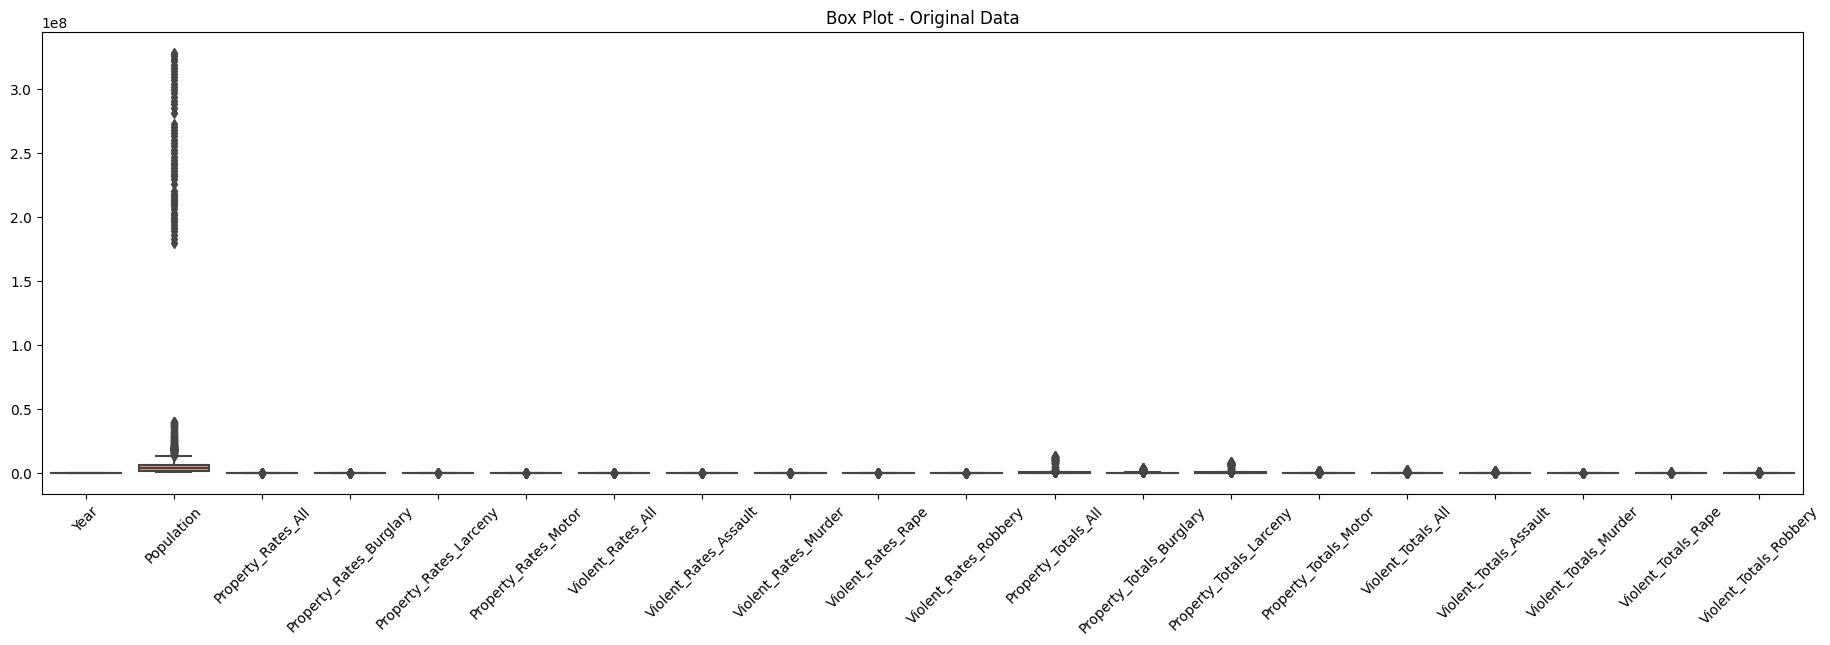

In [17]:
plt.figure(figsize=(50, 6))
plt.subplot(1, 2, 1)
numeric_columns = project_df.select_dtypes(include=['int64', 'float64'])
sns.boxplot(data=numeric_columns, orient='vertical')
plt.xticks(rotation=45)
plt.title('Box Plot - Original Data');

In [18]:
project_df

State  Year  Population  Property_Rates_All  Property_Rates_Burglary  \
0     alabama  1960     3266740              1035.4                    355.9   
1     alabama  1961     3302000               985.5                    339.3   
2     alabama  1962     3358000              1067.0                    349.1   
3     alabama  1963     3347000              1150.9                    376.9   
4     alabama  1964     3407000              1358.7                    466.6   
...       ...   ...         ...                 ...                      ...   
3110  wyoming  2015      586107              1902.6                    300.6   
3111  wyoming  2016      585501              1957.3                    302.5   
3112  wyoming  2017      579315              1830.4                    275.0   
3113  wyoming  2018      577737              1785.1                    264.0   
3114  wyoming  2019      578759              1571.1                    241.2   

      Property_Rates_Larceny  Property_Rates_Motor  Violent_Rates_All  \
0                      592.1                  87.3              186.6   
1                      569.4                  76.8              168.5   
2                      634.5                  83.4              157.3   
3                      683.4                  90.6              182.7   
4                      784.1                 108.0              213.1   
...                      ...                   ...                ...   
3110                  1500.9                 101.0              222.1   
3111                  1518.2                 136.6              244.2   
3112                  1421.0                 134.5              237.5   
3113                  1375.9                 145.2              212.2   
3114                  1206.7                 123.2              217.4   

      Violent_Rates_Assault  Violent_Rates_Murder  ...  Violent_Rates_Robbery  \
0                     138.1                  12.4  ...                   27.5   
1                     128.9                  12.9  ...                   19.1   
2                     119.0                   9.4  ...                   22.5   
3                     142.1                  10.2  ...                   24.7   
4                     163.0                   9.3  ...                   29.1   
...                     ...                   ...  ...                    ...   
3110                  179.8                   2.7  ...                   10.1   
3111                  195.7                   3.4  ...                   10.1   
3112                  176.4                   2.6  ...                   13.1   
3113                  150.6                   2.3  ...                   17.3   
3114                  147.6                   2.2  ...                   11.6   

      Property_Totals_All  Property_Totals_Burglary  Property_Totals_Larceny  \
0                   33823                     11626                    19344   
1                   32541                     11205                    18801   
2                   35829                     11722                    21306   
3                   38521                     12614                    22874   
4                   46290                     15898                    26713   
...                   ...                       ...                      ...   
3110                11151                      1762                     8797   
3111                11460                      1771                     8889   
3112                10604                      1593                     8232   
3113                10313                      1525                     7949   
3114                 9093                      1396                     6984   

      Property_Totals_Motor  Violent_Totals_All  Violent_Totals_Assault  \
0                      2853                6097                    4512   
1                      2535                5564                    4255   
2          

We can see that population column has more outliers but we cant remove that column as it the main one to determine the number of live people in the particular year.

## Exploratory Analysis and Visualization
We have created new sub dataframe as per analysis from project_df.

### Q. Determine which states consistently have the highest and lowest crime rates across all years.

In [19]:
# Group the data by 'State' and calculate the mean crime rates
state_avg_crime_rates = project_df.groupby('State')[['Property_Rates_All', 'Violent_Rates_All']].mean()
state_avg_crime_rates['Overall_Avg_Crime_Rate'] = state_avg_crime_rates.mean(axis=1)


# Rank the states by overall average crime rate in ascending order
ranked_states = state_avg_crime_rates.sort_values(by='Overall_Avg_Crime_Rate')

top_states_highest_crime = ranked_states.tail(10)

top_states_lowest_crime = ranked_states.head(10)


In [20]:
top_states_lowest_crime = top_states_lowest_crime.reset_index()
top_states_highest_crime = top_states_highest_crime.reset_index()

We use line Graph to represent Number of Victims on average faced Property Crimes and Voilent Crimes that took place in lowest.

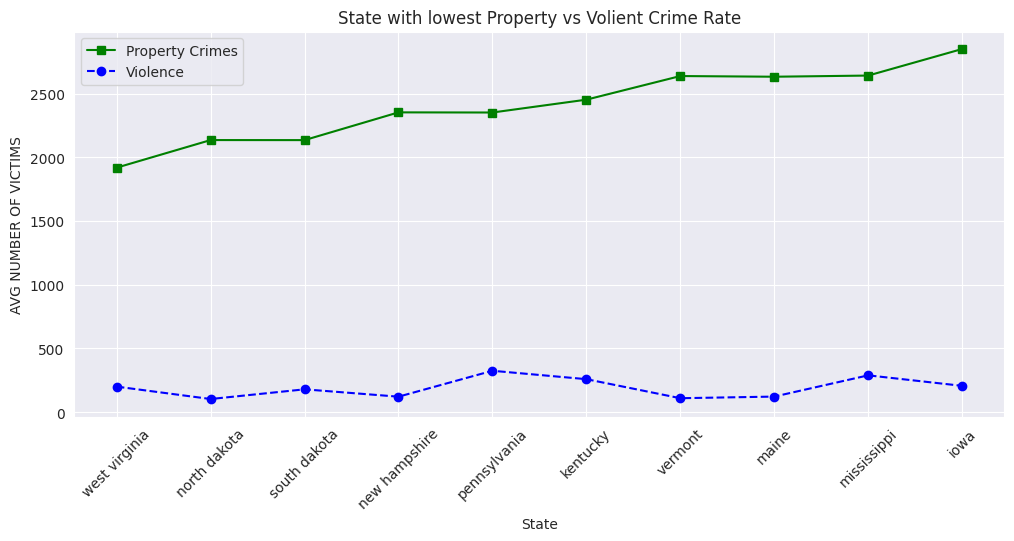

In [21]:
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
plt.title('State with lowest Property vs Volient Crime Rate')
plt.xlabel('State')
plt.ylabel('AVG NUMBER OF VICTIMS')
plt.plot(top_states_lowest_crime['State'],top_states_lowest_crime['Property_Rates_All'],'s-g');
plt.plot(top_states_lowest_crime['State'],top_states_lowest_crime['Violent_Rates_All'],'o--b')
plt.xticks(rotation=45)
plt.legend(['Property Crimes','Violence']);

Insight
1. The states with the lowest property crime rates are generally located in the Northeast and Northwest regions of the United States. The states with the highest property crime rates are generally located in the South and Southwest regions of the United States.
2. The states with the lowest violent crime rates are generally located in the Northeast and Midwest regions of the United States. The states with the highest violent crime rates are generally located in the South and West regions of the United States.

We use line Graph to represent Number of Victims on average rate faced Property Crimes and Voilent Crimes that took place in Highest.



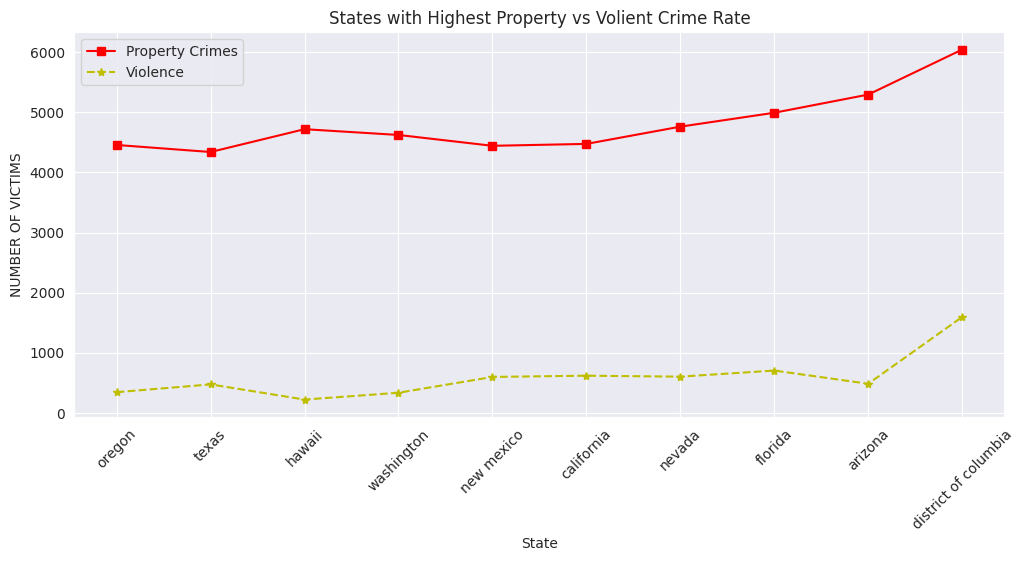

In [22]:
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
plt.title('States with Highest Property vs Volient Crime Rate')
plt.xlabel('State')
plt.ylabel('NUMBER OF VICTIMS')
plt.plot(top_states_highest_crime['State'],top_states_highest_crime['Property_Rates_All'],'s-r');
plt.plot(top_states_highest_crime['State'],top_states_highest_crime['Violent_Rates_All'],'*--y')
plt.xticks(rotation=45)
plt.legend(['Property Crimes','Violence']);

Insight

1. The District of Columbia has the highest overall crime rate, with over 5,000 victims of property crime and violent crime per 100,000 people.
2. Hawaii has Voilent Crimes.

In [23]:
united_states = project_df[project_df['State']=="united states"]

### Q. Time series on Rapes in United States using Histogram? (univariate)

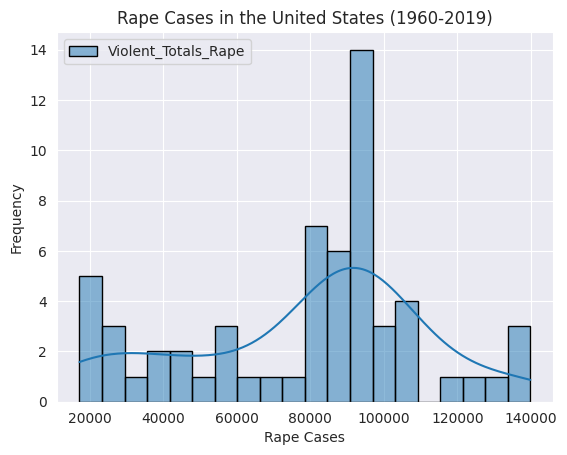

In [24]:
import matplotlib.pyplot as plt

data = united_states[['Violent_Totals_Rape']]
sns.set_style("darkgrid")
sns.histplot(data, bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Rape Cases in the United States (1960-2019)')
plt.xlabel('Rape Cases')
plt.ylabel('Frequency')

plt.show()


Insight

One possibility is that there has been an increase in the actual number of rape cases occurring. This could be due to a number of factors, such as changes in social norms, increased awareness of rape, or changes in reporting practices.

1. The number of rape cases has increased more rapidly than the population of the United States. This suggests that the rate of rape has increased over time.

2. The increase in rape cases is not evenly distributed across all demographic groups.

3. The number of rape cases reported to the police is likely lower than the actual number of rape cases that occur. This is because many victims of rape do not report the crime to the police.


### Q. Compare Rape vs Murder crimes in United States using line plot? (Multivariate)

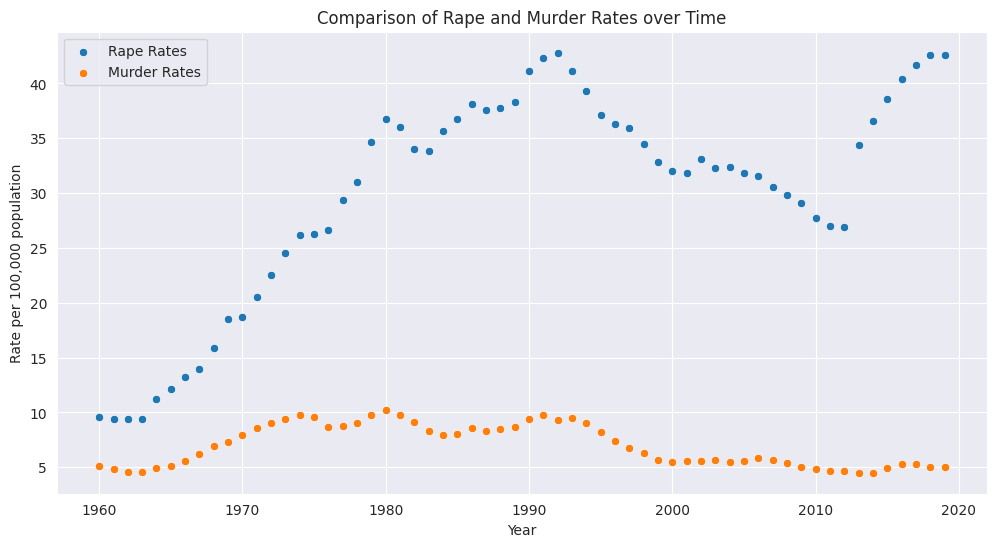

In [25]:
# Filter the data for Rape and Murder rates
data = united_states[['Year', 'Violent_Rates_Rape', 'Violent_Rates_Murder']]

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.scatterplot(x='Year', y='Violent_Rates_Rape', data=data, label='Rape Rates')
sns.scatterplot(x='Year', y='Violent_Rates_Murder', data=data, label='Murder Rates')
plt.xlabel('Year')
plt.ylabel('Rate per 100,000 population')
plt.title('Comparison of Rape and Murder Rates over Time')
plt.legend()
plt.show()


1. The graph shows that the rate of rape has been increasing over time, while the rate of murder has been decreasing. This is a complex issue with many potential explanations. More research is needed to understand the causes of these trends and to develop effective strategies to address them.

2. The increase in rape cases is due to changes in the definition of rape. Over time, the definition of rape has been broadened to include more types of sexual assault. This means that some cases that would not have been considered rape in the past are now counted as rape cases.

###Q. Compare Assault cases in all States between 1960-2019? (Bivariate)

In [26]:
new_df = project_df.groupby('State')[['Property_Totals_All','Property_Totals_Burglary',
       'Property_Totals_Larceny', 'Property_Totals_Motor',
       'Violent_Totals_All', 'Violent_Totals_Assault', 'Violent_Totals_Murder',
       'Violent_Totals_Rape', 'Violent_Totals_Robbery']].sum()    # grouping on the basis of state and presting the just the states with sum of each column for all the years.

In [27]:
new_df.reset_index(inplace=True)

In [28]:
new_df = new_df[new_df['State'] != 'united states']   # removing united states as its not state , for time being
new_sort_df = new_df.sort_values(by='Violent_Totals_Assault', ascending=False)

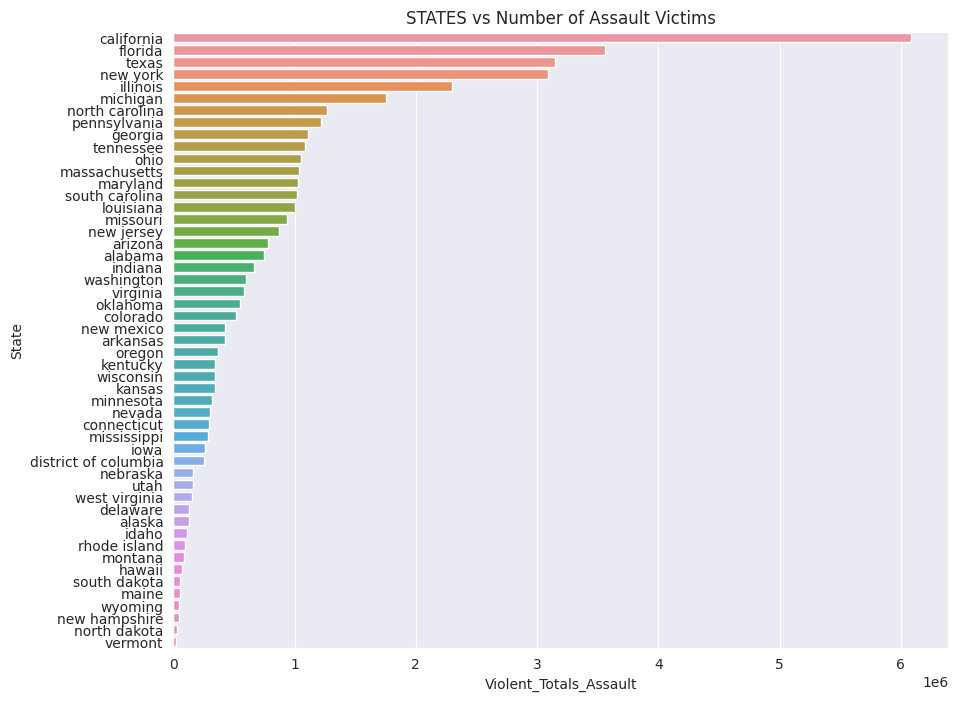

In [29]:
plt.figure(figsize=(10,8))
plt.title('STATES vs Number of Assault Victims')
sns.barplot(x = new_sort_df['Violent_Totals_Assault'],y = new_sort_df['State']);

Insights
1. California, Florida, and Texas are the states with the most assault victims.
2. The bottom 10 states have fewer than 100,000 assault victims each.
3. There is a general trend of decreasing assault rates from north to south, with the exception of the District of Columbia, which has a higher assault rate than most southern states.

###Q. Property vs Violent crimes between all the states?

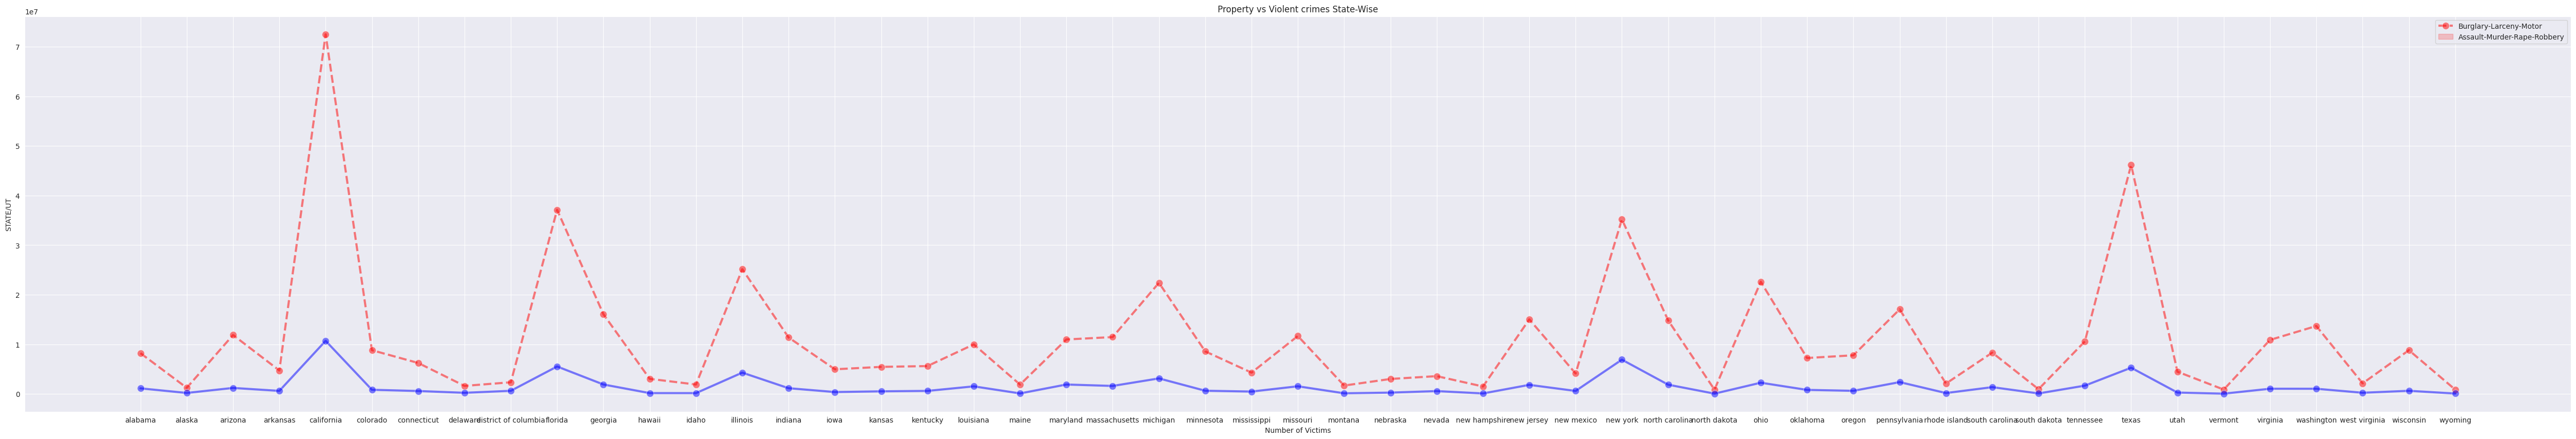

In [30]:
plt.figure(figsize=(64,10))
plt.title('Property vs Violent crimes State-Wise')
plt.xlabel('Number of Victims')
plt.ylabel('STATE/UT')
sns.lineplot(y = new_df['Property_Totals_All'],x = new_df['State'],marker='o', color='r', ls='--', lw=3, ms=10, alpha=.5)
sns.lineplot(y = new_df['Violent_Totals_All'],x = new_df['State'],marker='o', color='b', ls='-', lw=3, ms=10, alpha=.5)
plt.legend(['Burglary-Larceny-Motor','Assault-Murder-Rape-Robbery']);

### Q. Correlations between different types of crime rates over the years.

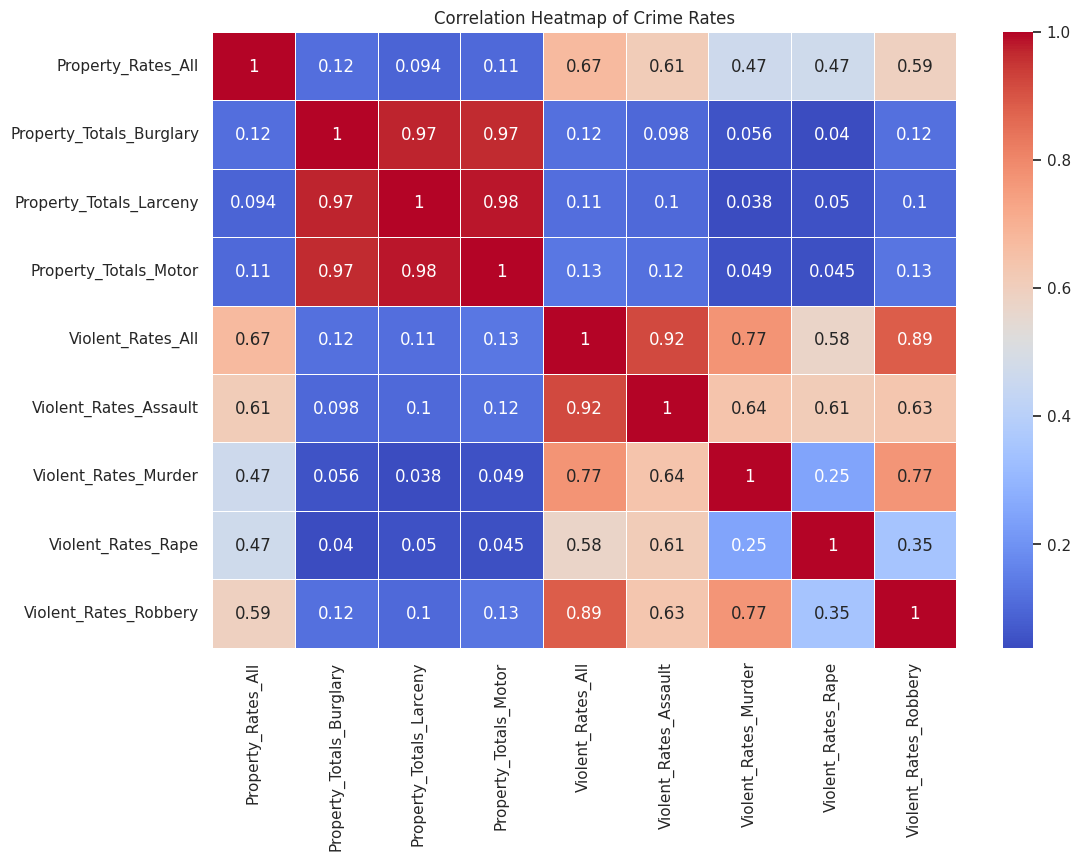

In [31]:
crime_rates = project_df[['Year', 'Property_Rates_All', 'Property_Totals_Burglary',
       'Property_Totals_Larceny', 'Property_Totals_Motor', 'Violent_Rates_All', 'Violent_Rates_Assault',
                  'Violent_Rates_Murder', 'Violent_Rates_Rape', 'Violent_Rates_Robbery']]

# Set the 'Year' column as the index
crime_rates.set_index('Year', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(crime_rates.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Crime Rates')
plt.show()

### Q. Top 10 states with Robbery Crime.

In [32]:
c = new_df.sort_values('Violent_Totals_Robbery',ascending= False)[['State','Violent_Totals_Robbery']].head(10)
c

State  Violent_Totals_Robbery
4     california                 3898075
32      new york                 3492701
13      illinois                 1713250
43         texas                 1623937
9        florida                 1600229
22      michigan                 1037065
38  pennsylvania                  950968
35          ohio                  943300
30    new jersey                  834762
20      maryland                  745843

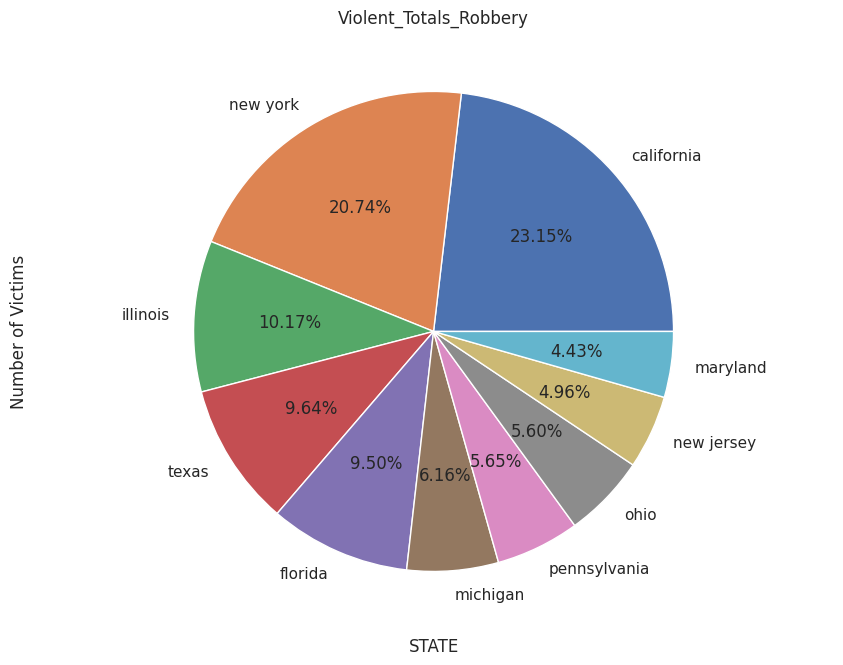

In [33]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.xlabel('STATE')
plt.ylabel("Number of Victims")
plt.title('Violent_Totals_Robbery')
mylabels = c['State']
no_of_Victims = c['Violent_Totals_Robbery']
ax.pie(no_of_Victims, labels = mylabels,autopct='%1.2f%%')
plt.show()

1. California has the highest number of victims: According to the pie chart, California accounts for 23.15% of the total number of violent robbery victims in the United States, which is the largest share among all states. This means that almost one in four victims of violent robbery in the country are from California.
2. New York is the second highest: The second largest section in the pie chart is for New York, which has 20.74% of the total number of victims. This means that more than one in five victims of violent robbery in the country are from New York.
3. Illinois, Texas, and Florida are also high: The next three sections in the pie chart are for Illinois, Texas, and Florida, which have 10.17%, 9.50%, and 9.16% of the total number of victims, respectively. These three states together have almost 30% of the total number of victims.
4. Maryland has the lowest number of victims: The smallest section in the pie chart is for Maryland, which has only 4.43% of the total number of victims. This means that less than one in twenty victims of violent robbery in the country are from Maryland.

### Q. Distribution of victims for different types of Property crimes.

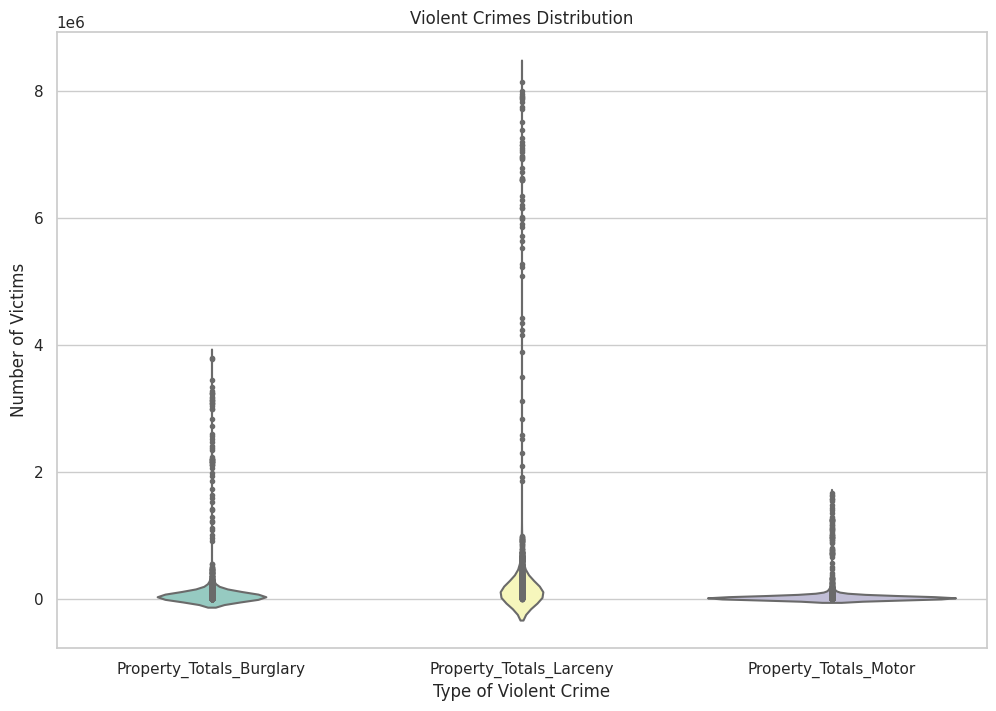

In [34]:
data = project_df[['Property_Totals_Burglary','Property_Totals_Larceny', 'Property_Totals_Motor']]

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.violinplot(data=data,inner="points", palette="Set3")
plt.title('Violent Crimes Distribution')
plt.ylabel('Number of Victims')
plt.xlabel('Type of Violent Crime')
plt.show()


Insight

1. **Property Totals, Larceny has the highest number of victims**: The yellow plot for Property Totals, Larceny has the highest peak and the widest range, indicating that this category has the most victims and the most variation in the number of victims. The median number of victims for this category is around **8,000,000**, which is much higher than the other two categories.
2. **Property Totals, Motor has the lowest number of victims**: The blue plot for Property Totals, Motor has the lowest peak and the narrowest range, indicating that this category has the least victims and the least variation in the number of victims. The median number of victims for this category is around **1,000,000**, which is much lower than the other two categories.
3. **Property Totals, Burglary has a skewed distribution**: The green plot for Property Totals, Burglary has a skewed distribution, with a long tail on the right side. This means that most of the victims are concentrated in the lower range, but there are some outliers with very high numbers of victims. The median number of victims for this category is around **2,500,000**, which is between the other two categories.

### Q.Motor theft accross over years.

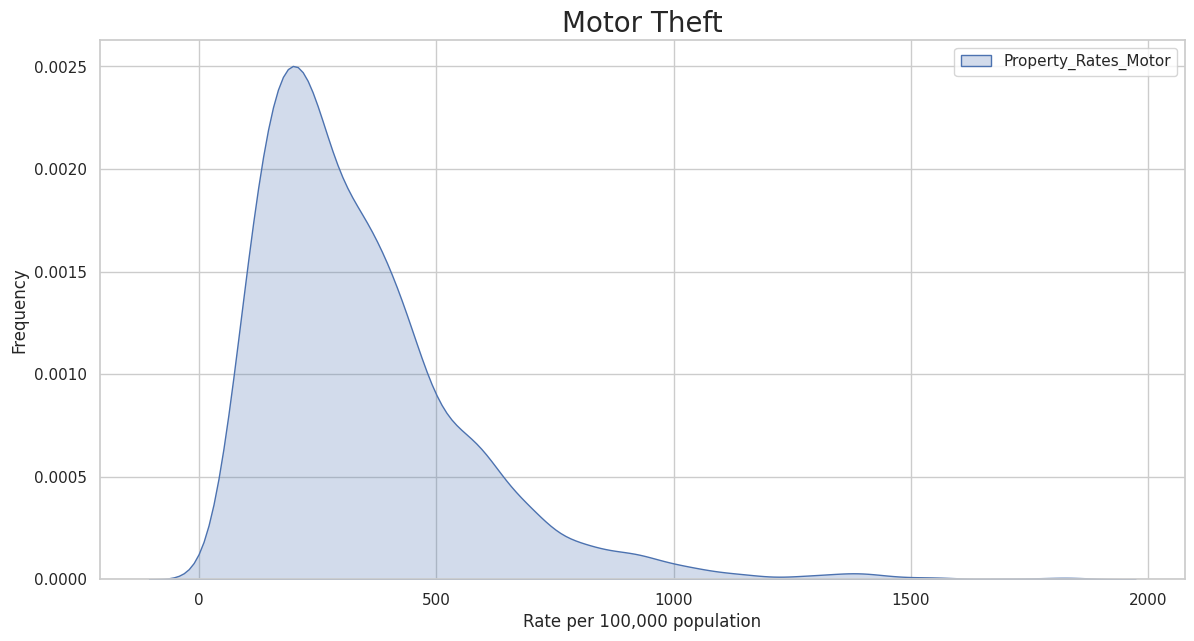

In [35]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(project_df[['Property_Rates_Motor']], color="Red", fill = True)
g.set_xlabel("Rate per 100,000 population")
g.set_ylabel("Frequency")
plt.title('Motor Theft',size = 20)
plt.show()

Insight from above graph , “Motor Theft” showing the frequency of motor theft rates per 100,000 population. The graph is a bell curve with the peak around 500, indicating that the most common rate of motor theft is around 500 per 100,000 population. The graph suggests that motor theft rates have decreased over the years

### Q. Pair Plot

In [36]:
Pair_plot = project_df[['Population', 'Property_Rates_All',
       'Property_Rates_Burglary', 'Property_Rates_Larceny',
       'Property_Rates_Motor', 'Violent_Rates_All', 'Violent_Rates_Assault',
       'Violent_Rates_Murder', 'Violent_Rates_Rape', 'Violent_Rates_Robbery',
       'Property_Totals_All', 'Property_Totals_Burglary',
       'Property_Totals_Larceny', 'Property_Totals_Motor',
       'Violent_Totals_All', 'Violent_Totals_Assault', 'Violent_Totals_Murder',
       'Violent_Totals_Rape', 'Violent_Totals_Robbery']]

In [37]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

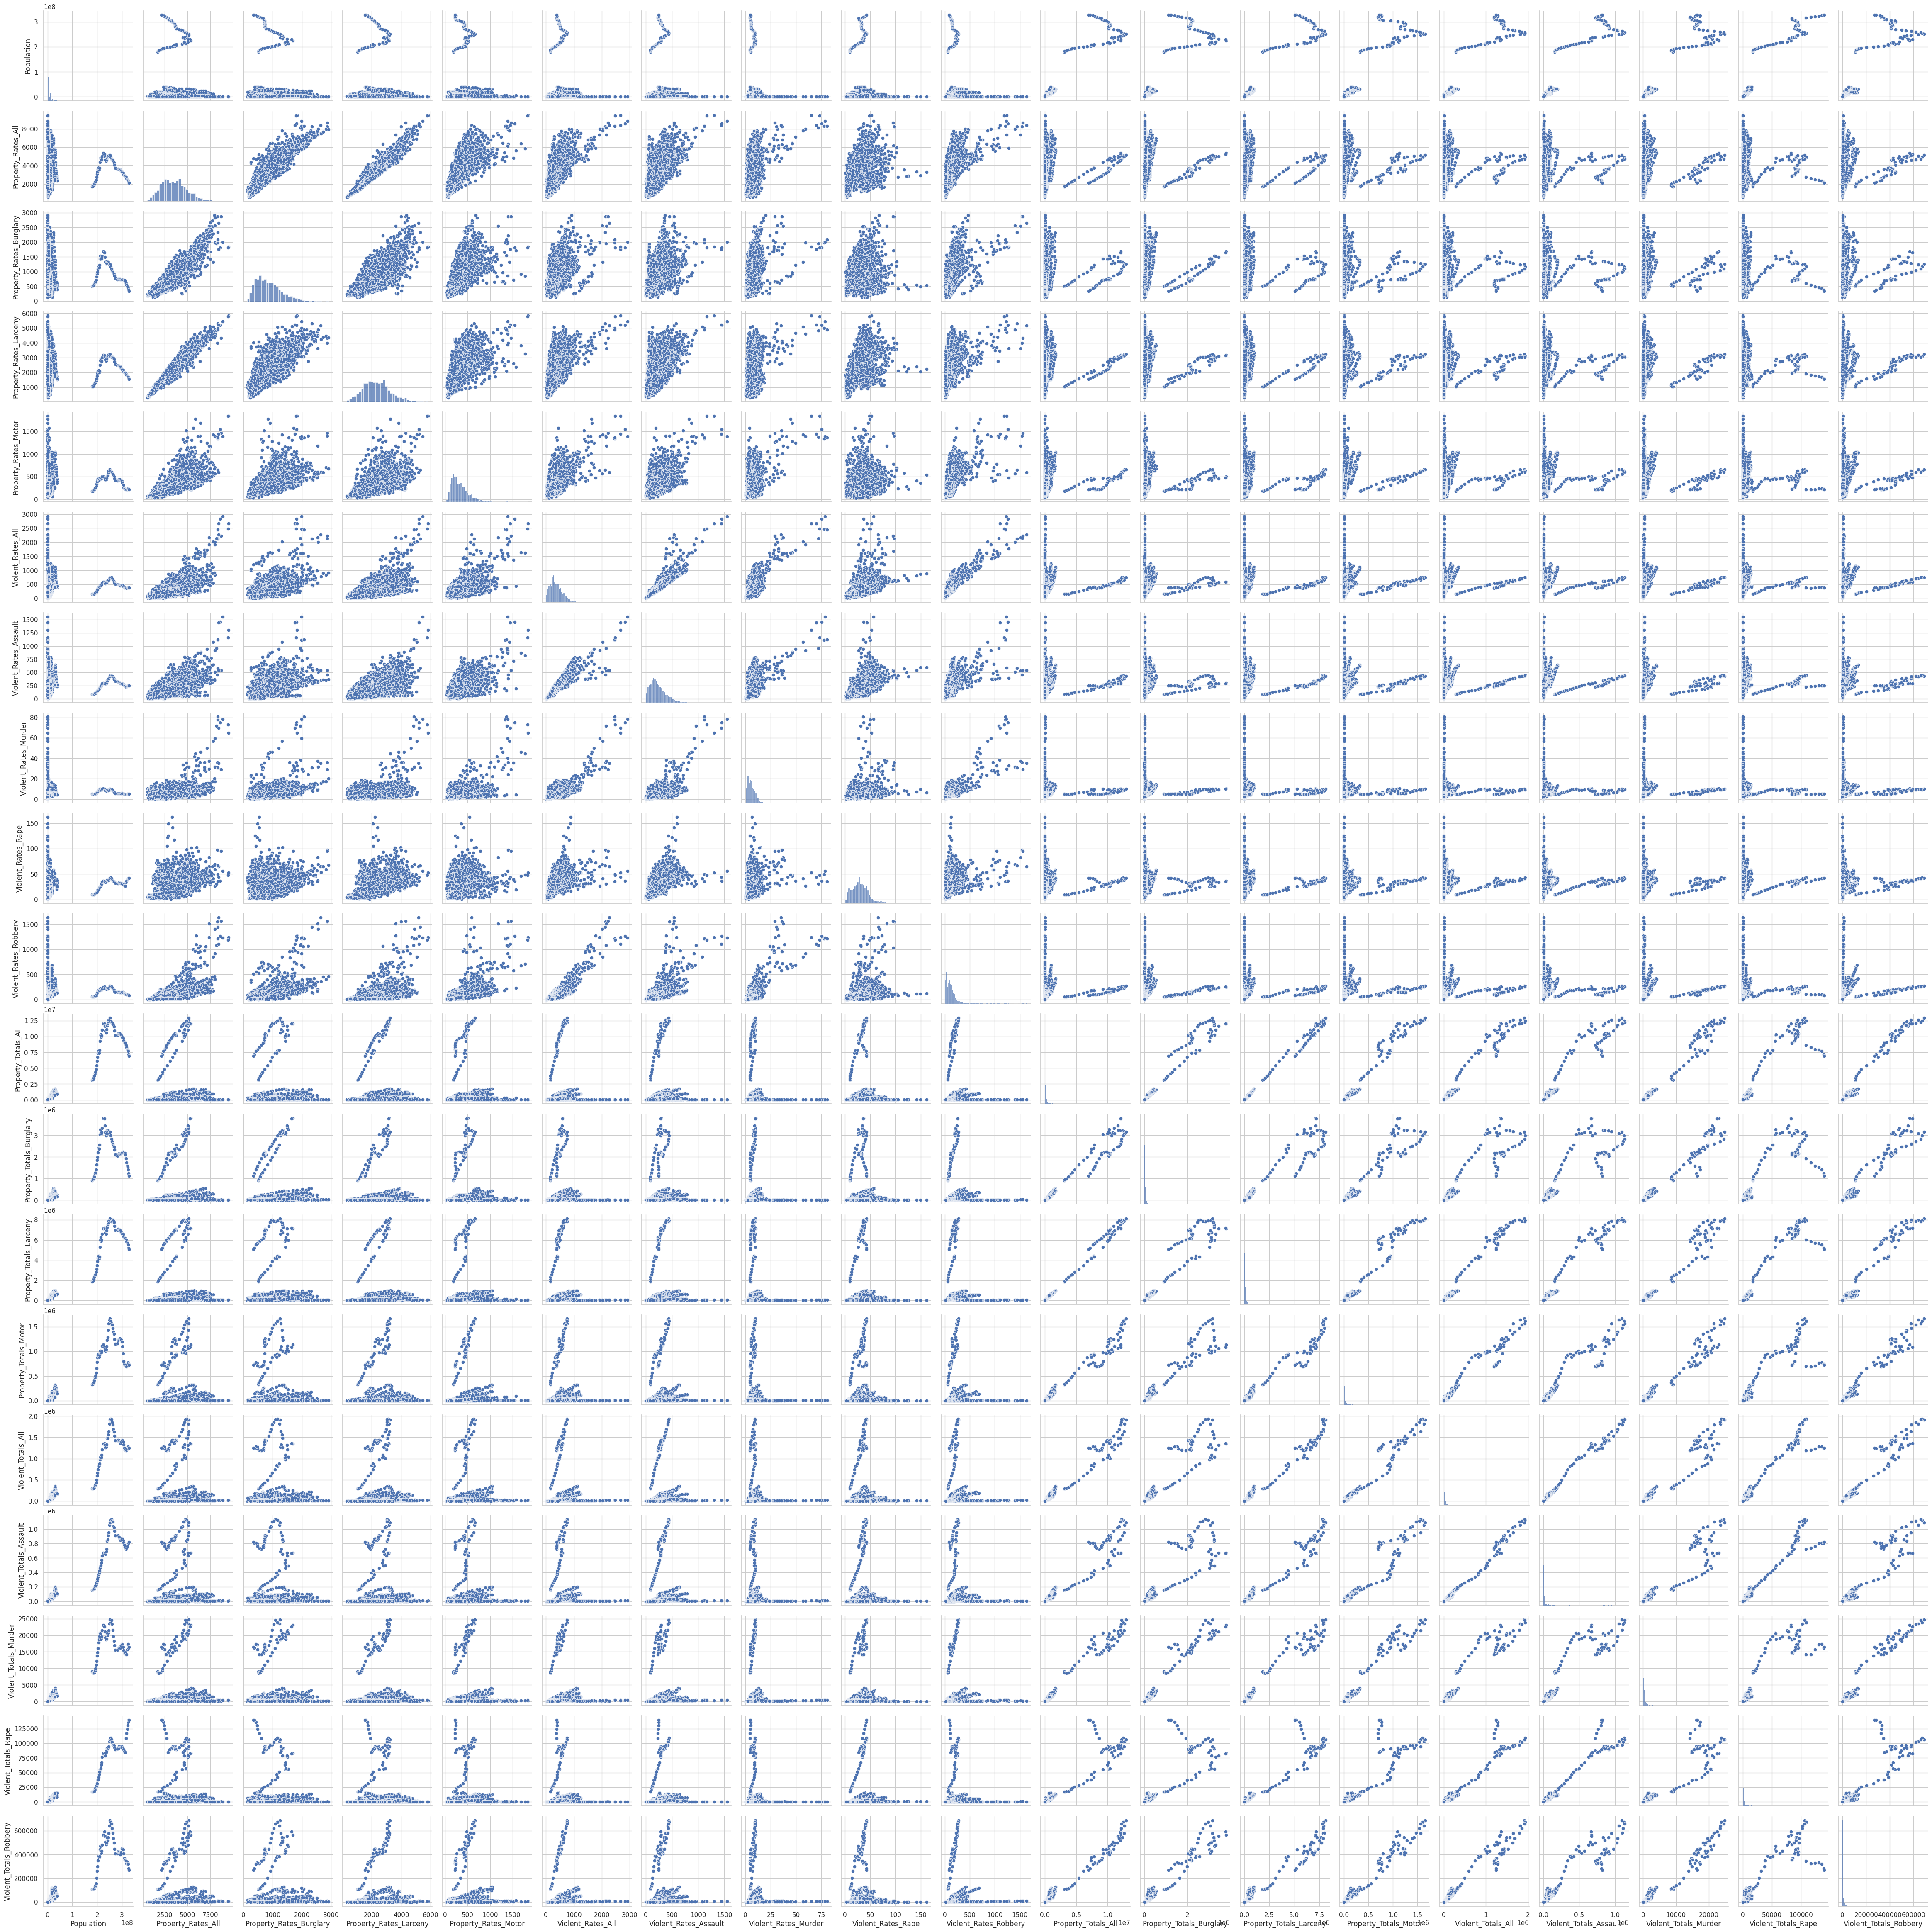

In [38]:
sns.pairplot(Pair_plot);

## Conclusion

This project's primary objective is to analyze US crime rates between 1960 and 2019.

In order to acquire a thorough examination of this data set, we used a variety of charting, sorting, aggregation, and many other Python techniques in this project. We also asked a few questions and provided answers as needed.

1. The states with the lowest property crime rates are generally located in the Northeast and Northwest regions of the United States. The states with the highest property crime rates are generally located in the South and Southwest regions of the United States.
2. The states with the lowest violent crime rates are generally located in the Northeast and Midwest regions of the United States. The states with the highest violent crime rates are generally located in the South and West regions of the United States.
3. Property Totals, Larceny has the highest number of victims
4. California has the highest number of victims: According to the pie chart, California accounts for 23.15% of the total number of violent robbery victims in the United States, which is the largest share among all states. This means that almost one in four victims of violent robbery in the country are from California.
5. California, Florida, and Texas are the states with the most assault victims.
6. There is a general trend of decreasing assault rates from north to south, with the exception of the District of Columbia, which has a higher assault rate than most southern states.
7. The number of rape cases has increased more rapidly than the population of the United States. This suggests that the rate of rape has increased over time.

8. The increase in rape cases is not evenly distributed across all demographic groups.


# References and Future Work
## Reference:
about pandas and it's functions in deatil - https://pandas.pydata.org

ideas on Matplotlib and it's library- https://matplotlib.org

plotting diferent types of graphs https://seaborn.pydata.org/#

## Future:
After reviewing the data analysis, I'm interested in focusing on data cleaning and exploring visualizations. Given the dataset's numerous columns, I've condensed them for my initial analysis. Now, I aim to display the relevant data on the screen and engage in further exploration through graphs.

In [39]:
import jovian

In [40]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
